# Notebook 9: Classical vs Neural Comparison

**Purpose**: Compare classical ML models with neural network models.

**Inputs**:
- `classical_metrics.csv`
- `neural_metrics.csv`

**Outputs**:
- Comparison visualizations → `charts/`

---

In [8]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
BASE_DIR = Path('.').resolve().parent
RESULTS_DIR = BASE_DIR / 'results'
CHARTS_DIR = BASE_DIR / 'charts'
CHARTS_DIR.mkdir(exist_ok=True)

# Style
plt.style.use('seaborn-v0_8-whitegrid')
colors = {'classical': '#3498db', 'neural': '#e74c3c'}

print(f"Charts will be saved to: {CHARTS_DIR}")

Charts will be saved to: C:\Users\mostr\OneDrive\Documents\GitHub\Proj\Anomaly-detection-in-finance-using-QML\charts


In [9]:
# Load metrics
classical_df = pd.read_csv(RESULTS_DIR / 'classical_metrics.csv')
neural_df = pd.read_csv(RESULTS_DIR / 'neural_metrics.csv')

classical_df['category'] = 'Classical'
neural_df['category'] = 'Neural'

combined_df = pd.concat([classical_df, neural_df], ignore_index=True)

print(f"Classical models: {len(classical_df)}")
print(f"Neural models: {len(neural_df)}")

Classical models: 8
Neural models: 5


In [10]:
# Display all results
print("\nClassical Models:")
print(classical_df[['model', 'f1_score', 'roc_auc', 'train_time']].to_string(index=False))
print("\nNeural Models:")
print(neural_df[['model', 'f1_score', 'roc_auc', 'train_time']].to_string(index=False))


Classical Models:
                model  f1_score  roc_auc  train_time
           SVM_Linear  0.857143 0.909934  120.214205
              SVM_RBF  0.900000 0.904211    0.388940
  Logistic_Regression  0.782609 0.911382    0.077424
        Random_Forest  0.947368 0.998816    0.501200
     Isolation_Forest  0.212766 0.820263    0.191067
                  GMM  0.318182 0.878026    0.068837
Classical_Autoencoder  0.297872 0.845789    0.236201
        Classical_MLP  0.833333 0.947763    0.266343

Neural Models:
           model  f1_score  roc_auc  train_time
        Deep_MLP  0.947368 0.946447    1.977893
Deep_Autoencoder  0.425532 0.896053   11.250247
             VAE  0.244898 0.825263    6.713579
LSTM_Autoencoder  0.240000 0.831447    5.043341
       Deep_OCNN  0.320000 0.821184    2.723756


## Metric Comparison Charts

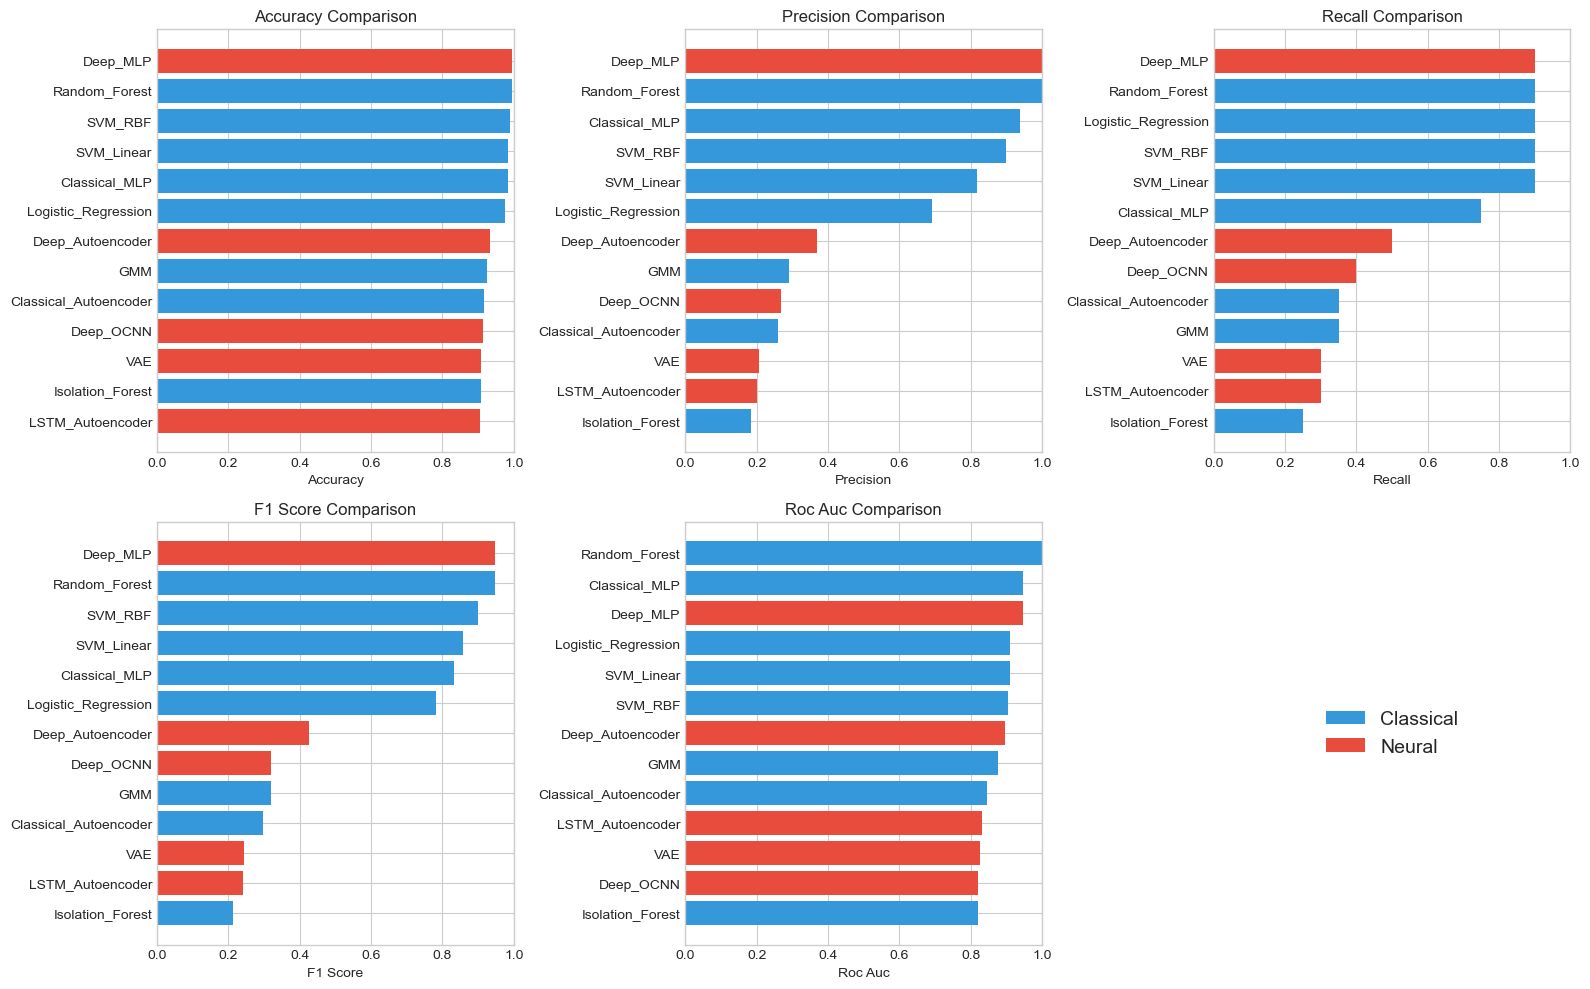

✅ Saved: classical_vs_neural_metrics.png


In [11]:
# Bar chart comparison for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # Sort by metric value
    data = combined_df.sort_values(metric, ascending=True)
    
    colors_list = [colors['classical'] if c == 'Classical' else colors['neural'] 
                   for c in data['category']]
    
    ax.barh(data['model'], data[metric], color=colors_list)
    ax.set_xlabel(metric.replace('_', ' ').title())
    ax.set_title(f'{metric.replace("_", " ").title()} Comparison')
    ax.set_xlim([0, 1])

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors['classical'], label='Classical'),
                   Patch(facecolor=colors['neural'], label='Neural')]
axes[-1].legend(handles=legend_elements, loc='center', fontsize=14)
axes[-1].axis('off')

plt.tight_layout()
plt.savefig(CHARTS_DIR / 'classical_vs_neural_metrics.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: classical_vs_neural_metrics.png")

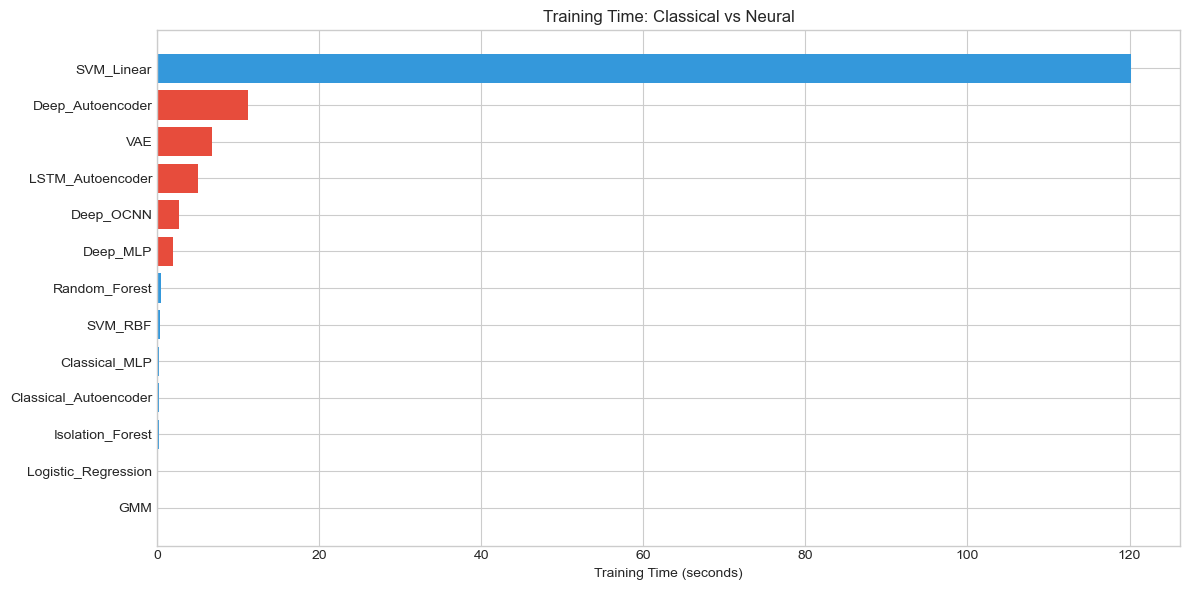

✅ Saved: classical_vs_neural_training_time.png


In [12]:
# Training time comparison
fig, ax = plt.subplots(figsize=(12, 6))

data = combined_df.sort_values('train_time', ascending=True)
colors_list = [colors['classical'] if c == 'Classical' else colors['neural'] 
               for c in data['category']]

ax.barh(data['model'], data['train_time'], color=colors_list)
ax.set_xlabel('Training Time (seconds)')
ax.set_title('Training Time: Classical vs Neural')

plt.tight_layout()
plt.savefig(CHARTS_DIR / 'classical_vs_neural_training_time.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: classical_vs_neural_training_time.png")

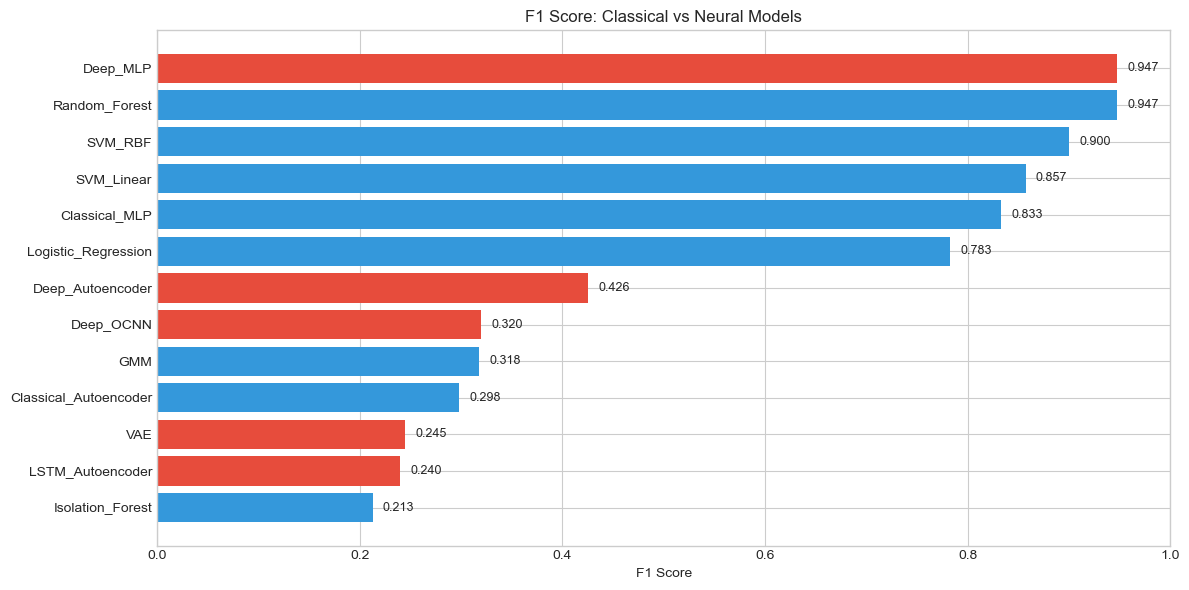

✅ Saved: classical_vs_neural_f1_score.png


In [13]:
# F1 Score comparison bar chart
fig, ax = plt.subplots(figsize=(12, 6))

data = combined_df.sort_values('f1_score', ascending=True)
colors_list = [colors['classical'] if c == 'Classical' else colors['neural'] 
               for c in data['category']]

bars = ax.barh(data['model'], data['f1_score'], color=colors_list)
ax.set_xlabel('F1 Score')
ax.set_title('F1 Score: Classical vs Neural Models')
ax.set_xlim([0, 1])

# Add value labels
for bar, val in zip(bars, data['f1_score']):
    ax.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(CHARTS_DIR / 'classical_vs_neural_f1_score.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: classical_vs_neural_f1_score.png")

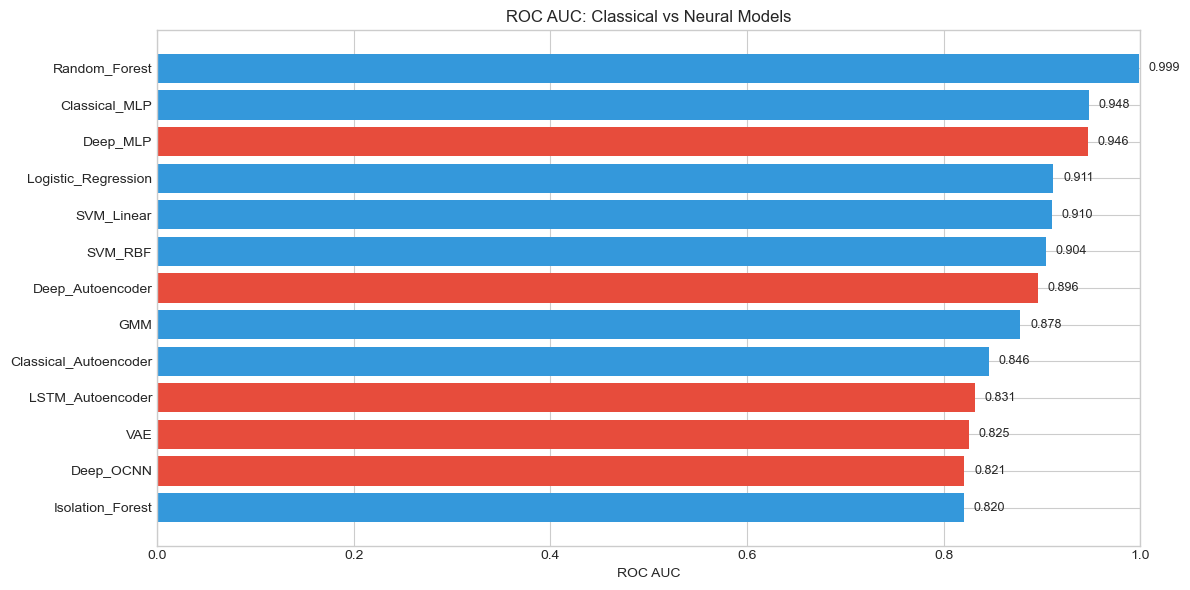

✅ Saved: classical_vs_neural_roc_auc.png


In [14]:
# ROC AUC comparison bar chart
fig, ax = plt.subplots(figsize=(12, 6))

data = combined_df.sort_values('roc_auc', ascending=True)
colors_list = [colors['classical'] if c == 'Classical' else colors['neural'] 
               for c in data['category']]

bars = ax.barh(data['model'], data['roc_auc'], color=colors_list)
ax.set_xlabel('ROC AUC')
ax.set_title('ROC AUC: Classical vs Neural Models')
ax.set_xlim([0, 1])

# Add value labels
for bar, val in zip(bars, data['roc_auc']):
    ax.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(CHARTS_DIR / 'classical_vs_neural_roc_auc.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: classical_vs_neural_roc_auc.png")

In [15]:
# Best model per metric comparison
print("\n" + "="*70)
print("BEST MODEL PER METRIC: CLASSICAL VS NEURAL")
print("="*70)

metrics_to_compare = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
best_results = []

for metric in metrics_to_compare:
    # Best classical
    best_classical_idx = classical_df[metric].idxmax()
    best_classical = classical_df.loc[best_classical_idx]
    
    # Best neural
    best_neural_idx = neural_df[metric].idxmax()
    best_neural = neural_df.loc[best_neural_idx]
    
    # Determine winner
    if best_classical[metric] > best_neural[metric]:
        winner = 'Classical'
        winner_model = best_classical['model']
        winner_value = best_classical[metric]
    else:
        winner = 'Neural'
        winner_model = best_neural['model']
        winner_value = best_neural[metric]
    
    best_results.append({
        'Metric': metric.replace('_', ' ').title(),
        'Best Classical': f"{best_classical['model']} ({best_classical[metric]:.4f})",
        'Best Neural': f"{best_neural['model']} ({best_neural[metric]:.4f})",
        'Winner': f"{winner}: {winner_model}"
    })
    
    print(f"\n{metric.replace('_', ' ').title()}:")
    print(f"  Best Classical: {best_classical['model']} = {best_classical[metric]:.4f}")
    print(f"  Best Neural: {best_neural['model']} = {best_neural[metric]:.4f}")
    print(f"  🏆 WINNER: {winner} ({winner_model})")

# Training time (lower is better)
print(f"\nTraining Time (lower is better):")
fastest_classical = classical_df.loc[classical_df['train_time'].idxmin()]
fastest_neural = neural_df.loc[neural_df['train_time'].idxmin()]

print(f"  Fastest Classical: {fastest_classical['model']} = {fastest_classical['train_time']:.4f}s")
print(f"  Fastest Neural: {fastest_neural['model']} = {fastest_neural['train_time']:.4f}s")

if fastest_classical['train_time'] < fastest_neural['train_time']:
    print(f"  🏆 WINNER: Classical ({fastest_classical['model']})")
else:
    print(f"  🏆 WINNER: Neural ({fastest_neural['model']})")


BEST MODEL PER METRIC: CLASSICAL VS NEURAL

Accuracy:
  Best Classical: Random_Forest = 0.9950
  Best Neural: Deep_MLP = 0.9950
  🏆 WINNER: Neural (Deep_MLP)

Precision:
  Best Classical: Random_Forest = 1.0000
  Best Neural: Deep_MLP = 1.0000
  🏆 WINNER: Neural (Deep_MLP)

Recall:
  Best Classical: SVM_Linear = 0.9000
  Best Neural: Deep_MLP = 0.9000
  🏆 WINNER: Neural (Deep_MLP)

F1 Score:
  Best Classical: Random_Forest = 0.9474
  Best Neural: Deep_MLP = 0.9474
  🏆 WINNER: Neural (Deep_MLP)

Roc Auc:
  Best Classical: Random_Forest = 0.9988
  Best Neural: Deep_MLP = 0.9464
  🏆 WINNER: Classical (Random_Forest)

Training Time (lower is better):
  Fastest Classical: GMM = 0.0688s
  Fastest Neural: Deep_MLP = 1.9779s
  🏆 WINNER: Classical (GMM)


In [16]:
# Create summary table
best_df = pd.DataFrame(best_results)
print("\n" + "="*70)
print("SUMMARY TABLE")
print("="*70)
print(best_df.to_string(index=False))

# Save summary
best_df.to_csv(RESULTS_DIR / 'classical_vs_neural_best.csv', index=False)
print(f"\n✅ Saved: classical_vs_neural_best.csv")


SUMMARY TABLE
   Metric         Best Classical       Best Neural                   Winner
 Accuracy Random_Forest (0.9950) Deep_MLP (0.9950)         Neural: Deep_MLP
Precision Random_Forest (1.0000) Deep_MLP (1.0000)         Neural: Deep_MLP
   Recall    SVM_Linear (0.9000) Deep_MLP (0.9000)         Neural: Deep_MLP
 F1 Score Random_Forest (0.9474) Deep_MLP (0.9474)         Neural: Deep_MLP
  Roc Auc Random_Forest (0.9988) Deep_MLP (0.9464) Classical: Random_Forest

✅ Saved: classical_vs_neural_best.csv


In [17]:
# Overall best model
print("\n" + "="*70)
print("OVERALL BEST MODELS")
print("="*70)

best_f1_overall = combined_df.loc[combined_df['f1_score'].idxmax()]
best_auc_overall = combined_df.loc[combined_df['roc_auc'].idxmax()]

print(f"\n🥇 Best by F1 Score: {best_f1_overall['model']} ({best_f1_overall['category']}) = {best_f1_overall['f1_score']:.4f}")
print(f"🥇 Best by ROC AUC: {best_auc_overall['model']} ({best_auc_overall['category']}) = {best_auc_overall['roc_auc']:.4f}")

print("\n✅ Notebook 9 Complete!")


OVERALL BEST MODELS

🥇 Best by F1 Score: Random_Forest (Classical) = 0.9474
🥇 Best by ROC AUC: Random_Forest (Classical) = 0.9988

✅ Notebook 9 Complete!
